In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn import neighbors
from sklearn import linear_model
from sklearn.svm import SVC

import matplotlib.pyplot as plt

In [2]:
user_data = pd.read_csv("north_america_sample.gz", compression='gzip', 
                        names=('mad_id', 'country', 'lat', 'lng', 'timestamp', 'source'))

In [3]:
# "Thu Mar 24 14:08:08 BRT 2016"
user_data['timestamp'] = pd.to_datetime(user_data['timestamp'], format='%a %b %d %H:%M:%S %Z %Y')

In [4]:
# Add colunm hour
user_data['hour'] = [ts.hour for ts in user_data.timestamp]

In [5]:
def distinct_users_per_country_job(data_frame):
    return data_frame.groupby('country').agg({'mad_id': pd.Series.nunique})

def peak_hour_of_day_job(data_frame):
    return data_frame.groupby(['country'])['hour'].apply(lambda x: x.value_counts().index[0])
    
def most_active_user_per_country_job(data_frame):
    return data_frame.groupby('country')['mad_id'].apply(lambda x: x.value_counts().index[0])
    
def average_hourly_requests_count_per_country_job(data_frame):
    return data_frame.groupby(['country', 'hour'])['mad_id'].count()

In [6]:
distinct_users_per_country_job(user_data)

,mad_id
country,
CA,17471
MX,807848
US,930476


In [7]:
peak_hour_of_day_job(user_data)

country
CA    21
MX     0
US    22
Name: hour, dtype: int64

In [8]:
most_active_user_per_country_job(user_data)

country
CA    0b4d2eb1-7f0c-40f8-bccf-90cbee8d5acd
MX    02e00826-fe83-4bac-9f14-8d59facb33b6
US    31f96fbe-9f1c-40d9-97a4-a211837e267e
Name: mad_id, dtype: object

In [9]:
average_hourly_requests_count_per_country_job(user_data)

country  hour
CA       0        10169
         1         7421
         2         5053
         3         3119
         4         2085
         5         1473
         6         1773
         7         2709
         8         4367
         9         6166
         10        7205
         11        7866
         12        8089
         13        8657
         14        8811
         15        9365
         16        9267
         17        8749
         18        8685
         19        9474
         20       11037
         21       13110
         22       13099
         23       12198
MX       0       695527
         1       653877
         2       475533
         3       288784
         4       156745
         5        90042
                  ...  
         18      422617
         19      429945
         20      503643
         21      589382
         22      644817
         23      691327
US       0       547853
         1       439369
         2       334574
         3       244449
  

# Indoor User Movement Prediction from RSS Data

In [10]:
df_target = pd.read_csv('MovementAAL/dataset/MovementAAL_target.csv', 
                             names=('sequence_ID', 'class_label'), 
                             skiprows=(1))

In [11]:
def get_dataframe(seq_id):
    return pd.read_csv('MovementAAL/dataset/MovementAAL_RSS_%s.csv' % seq_id, 
                           names=('RSS_anchor1', 'RSS_anchor2','RSS_anchor3', 'RSS_anchor4'), 
                           skiprows=(1))
def steps(df):
    value = 0
    for idx, row in df.iterrows():
        data = get_dataframe(row['sequence_ID'])
        value += len(data.get_values())
        
    return value

# print('Steps group 1: %d' % steps(df_target[df_target['sequence_ID'] < 105]))
# print('Steps group 2: %d' % steps(df_target[(df_target['sequence_ID'] > 104) & 
#                                                  (df_target['sequence_ID'] < 211)]))
# print('Steps group 3: %d' % steps(df_target[df_target['sequence_ID'] > 210]))
print('Total steps: %d' % steps(df_target))

Total steps: 13197


In [12]:
def create_data(df):
    frames = []
    target = []
    for idx, row in df.iterrows():
        data = get_dataframe(row['sequence_ID'])
        frames.append(data)
        arr = [row['class_label']] * len(data)
        target += arr
        
    return pd.concat(frames), target

# data_test, target_test = create_data(df_target[df_target['sequence_ID'] < 105])
data_test, target_test = create_data(df_target)

In [13]:
X = data_test.get_values()
y = target_test

n_samples = len(X)

perc = int(.8 * n_samples)
X_train = X[:perc]
y_train = y[:perc]
X_test = X[perc:]
y_test = y[perc:]

clf = SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

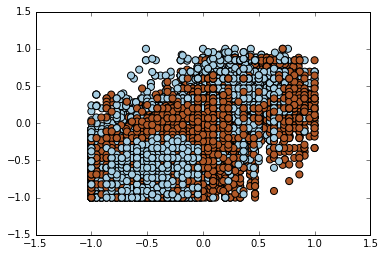

In [14]:
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)

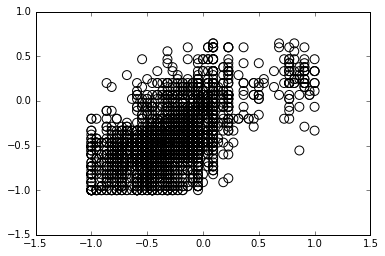

In [15]:
# Circle out the test data
plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none', zorder=10)

In [16]:
# Score
clf.score(X_train, y_train)

0.70351425594392347

In [18]:
# Predict Output
clf.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1])

In [19]:
n_samples = len(X)

perc = int(.8 * n_samples)
X_train = X[:perc]
y_train = y[:perc]
X_test = X[perc:]
y_test = y[perc:]

knn = neighbors.KNeighborsClassifier()
logistic = linear_model.LogisticRegression()

print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))
print('LogisticRegression score: %f'
      % logistic.fit(X_train, y_train).score(X_test, y_test))

KNN score: 0.651894
LogisticRegression score: 0.580682
